# Levelling Up
This code implements a new forms of fairness that ``levels-up'' instead of equalizing harms across groups (and consequentially harming some groups more than they were harmed by the original classifier).

See summary [wired article](https://www.wired.com/story/bias-statistics-artificial-intelligence-healthcare/) on the problems this addresses. More details are in the [paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4331652).

We compare conventional fairness algorithms that can increase the harm to some groups in the name of equality, against new approaches that only decrease the harm to individuals.

The code here reproduces the plots in the [paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4331652).


In [1]:
# Load and train a baseline classifier
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.fair import FairPredictor 
from autogluon.fair.utils import group_metrics as gm
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
predictor = TabularPredictor(label='class').fit(train_data=train_data)

# Set grid_width to 1000 to reproduce the plots in the paper exactly. 
# Setting it to False will give the default run-time, at the cost of slightly less detailed plots. 
grid_width=(False,1000)[0]

No path specified. Models will be saved in: "AutogluonModels/ag-20230209_125052/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230209_125052/"
AutoGluon Version:  0.6.3b20230208
Python Version:     3.9.15
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 22.3.0: Thu Jan  5 20:53:49 PST 2023; root:xnu-8792.81.2~2/RELEASE_X86_64
Train Data Rows:    39073
Train Data Columns: 14
Label Column: class
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [' <=50K', ' >50K']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K
	Note: For your binary classification, AutoGluon arbitrarily selected which

In [ ]:
#Enforcing demographic parity
# Modify predictor to enforce fairness over the train_data with respect to groups given by the column 'sex'
fpredictor = FairPredictor(predictor,train_data,'sex')
# Maximize accuracy while enforcing that the demographic parity (the difference in positive decision rates between men and women is at most 0.02)
fpredictor.fit(gm.accuracy,gm.demographic_parity,0.02,grid_width=grid_width)

Text(0.5, 1.0, 'Levelling Down: Demographic Parity vs Accuracy trade-off')

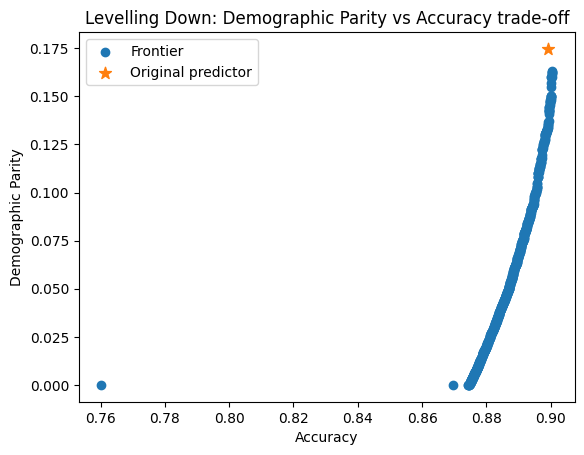

In [ ]:

fpredictor.plot_frontier(objective1=gm.demographic_parity,objective2=gm.accuracy, show_updated=False)
plt.title('Levelling Down: Demographic Parity vs Accuracy trade-off')

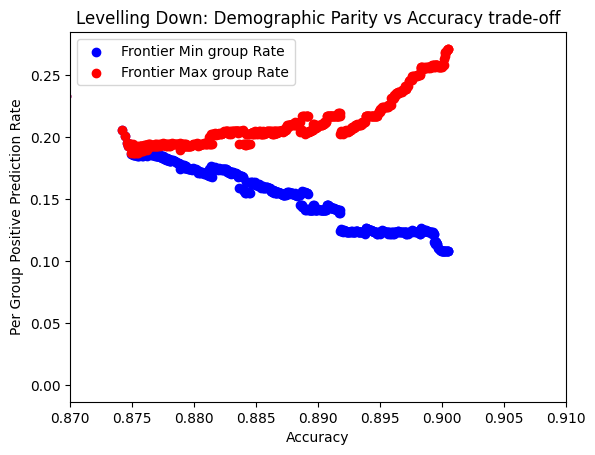

In [ ]:
#Plot an overlay of the selection rate for each group as we vary the accuracy/demographic parity trade-off
fpredictor.plot_frontier(objective1=gm.pos_pred_rate.min,objective2=gm.accuracy, color='blue')
fpredictor.plot_frontier(objective1=gm.pos_pred_rate.max,objective2=gm.accuracy,new_plot=False,color='red')
plt.xlim(0.87,0.91)
plt.title('Levelling Down: Demographic Parity vs Accuracy trade-off')
plt.ylabel('Per Group Positive Prediction Rate')
plt.legend(('Frontier Min group Rate', 'Frontier Max group Rate'))

In [ ]:
#Contrast with `Leveling-up' and enforcing a minimum selection rate for each group 
fpredictor.fit(gm.accuracy,gm.pos_pred_rate.min,0.275,grid_width=grid_width)

Text(0.5, 1.0, 'Levelling Up: Minimum Positive Prediction Rate vs Accuracy trade-off')

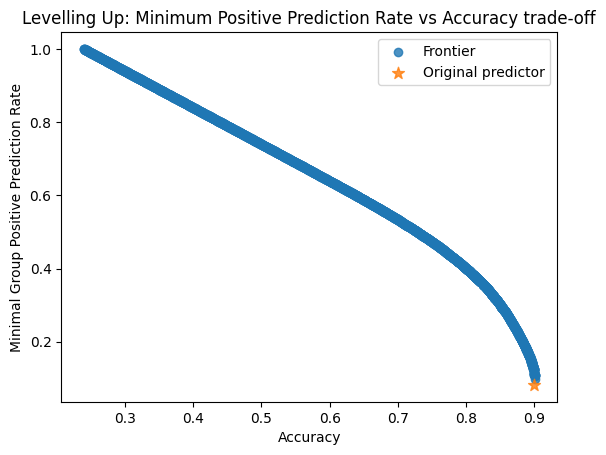

In [ ]:
#Plot the new frontier
fpredictor.plot_frontier(objective1=gm.pos_pred_rate.min,objective2=gm.accuracy,alpha=0.8, show_updated=False)
plt.title('Levelling Up: Minimum Positive Prediction Rate vs Accuracy trade-off')

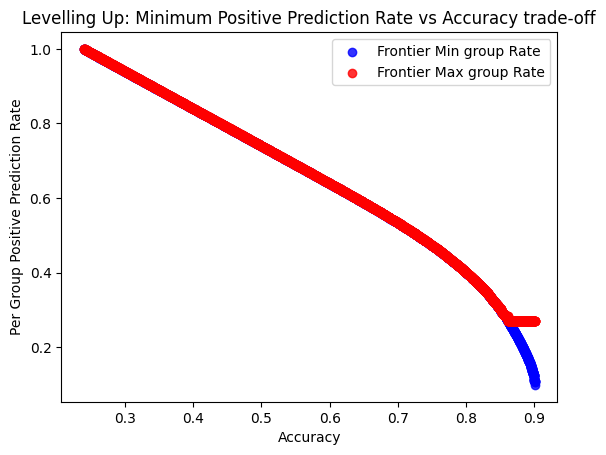

In [ ]:
#Plot the new frontier for each group
fpredictor.plot_frontier(objective1=gm.pos_pred_rate.min,objective2=gm.accuracy, color='blue',alpha=0.8)
fpredictor.plot_frontier(objective1=gm.pos_pred_rate.max,objective2=gm.accuracy,new_plot=False,color='red',alpha=0.8)
plt.title('Levelling Up: Minimum Positive Prediction Rate vs Accuracy trade-off')
plt.ylabel('Per Group Positive Prediction Rate')
plt.legend(('Frontier Min group Rate', 'Frontier Max group Rate',))

Text(0.5, 1.0, 'Levelling Up: Minimum Positive Prediction Rate vs Accuracy trade-off')

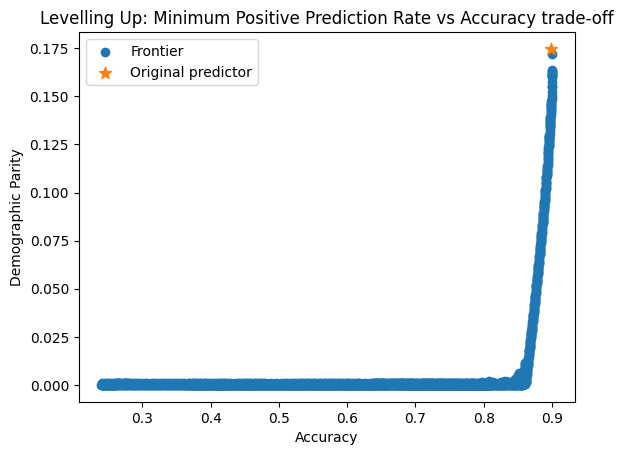

In [ ]:
#Plot the new frontier with respect to demographic parity
fpredictor.plot_frontier(objective1=gm.demographic_parity,objective2=gm.accuracy, show_updated=False)
plt.title('Levelling Up: Minimum Positive Prediction Rate vs Accuracy trade-off')


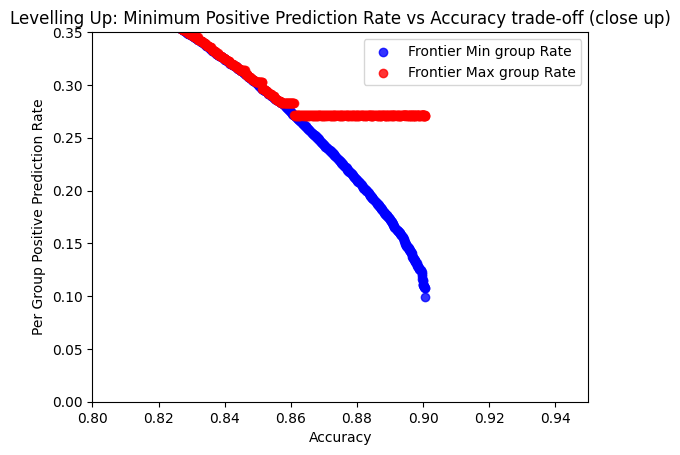

In [ ]:
# Plot a detail of the behaviour of the frontier with respect to each group
fpredictor.plot_frontier(objective1=gm.pos_pred_rate.min,objective2=gm.accuracy, color='blue',alpha=0.8)
fpredictor.plot_frontier(objective1=gm.pos_pred_rate.max,objective2=gm.accuracy,new_plot=False,color='red',alpha=0.8)
plt.ylim(0,0.35)
plt.xlim(0.8,0.95)
plt.title('Levelling Up: Minimum Positive Prediction Rate vs Accuracy trade-off (close up)')
plt.ylabel('Per Group Positive Prediction Rate')
plt.legend(('Frontier Min group Rate','Frontier Max group Rate',))

In [ ]:
#Do the same thing but for true negative difference. This fairness measure is analgous to equal opportunity but with the target label flipped.
fpredictor = FairPredictor(predictor,train_data,'sex')
# Maximize accuracy while enforcing that the equal opportunity (the difference in recall rates between men and women is at most 0.02)
fpredictor.fit(gm.accuracy,gm.true_neg_rate.diff,0.02,grid_width=grid_width)

Text(0.5, 1.0, 'Levelling Down: Difference in True NegativeRate vs Accuracy trade-off')

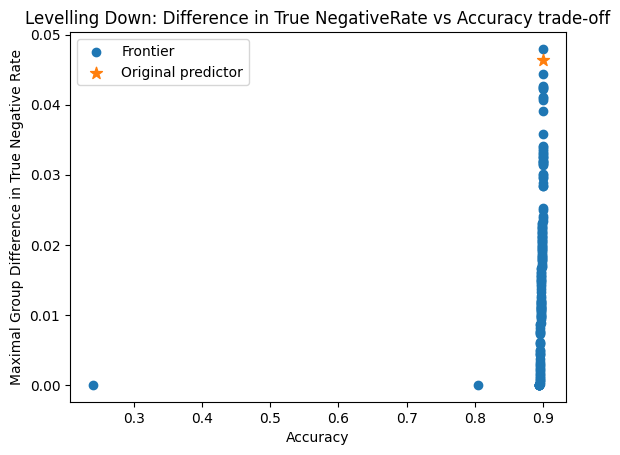

In [ ]:
#plot the accuracy/true negative rate trade-off
import matplotlib.pyplot as plt
fpredictor.plot_frontier(objective1=gm.true_neg_rate.diff,objective2=gm.accuracy, show_updated=False)
plt.title('Levelling Down: Difference in True Negative Rate vs Accuracy trade-off')


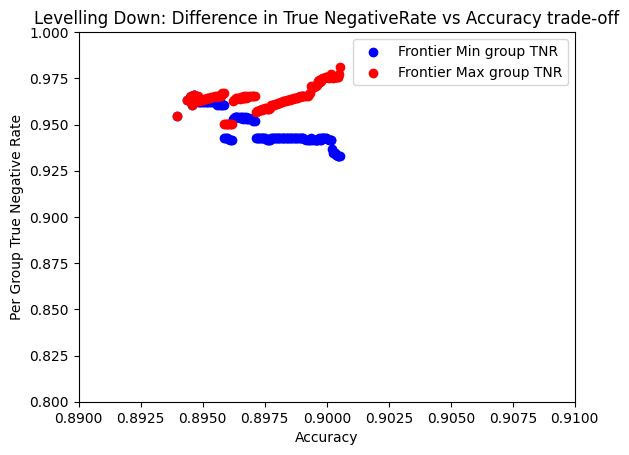

In [ ]:
# plot the trade-off for each group 
fpredictor.plot_frontier(objective1=gm.true_neg_rate.min,objective2=gm.accuracy, color='blue')
fpredictor.plot_frontier(objective1=gm.true_neg_rate.max,objective2=gm.accuracy,new_plot=False,color='red')
plt.xlim(0.89,0.91)
plt.ylim(0.8,1)
plt.title('Levelling Down: Difference in True NegativeRate vs Accuracy trade-off')
plt.ylabel('Per Group True Negative Rate')
plt.legend(('Frontier Min group TNR','Frontier Max group TNR',))

In [ ]:
#Instead perform levelling up, by increasing the minimal true negative rate per group
fpredictor.fit(gm.accuracy,gm.true_neg_rate.min,0.99,grid_width=grid_width)

Text(0.5, 1.0, 'Levelling Up: Minimum True NegativeRate vs Accuracy trade-off')

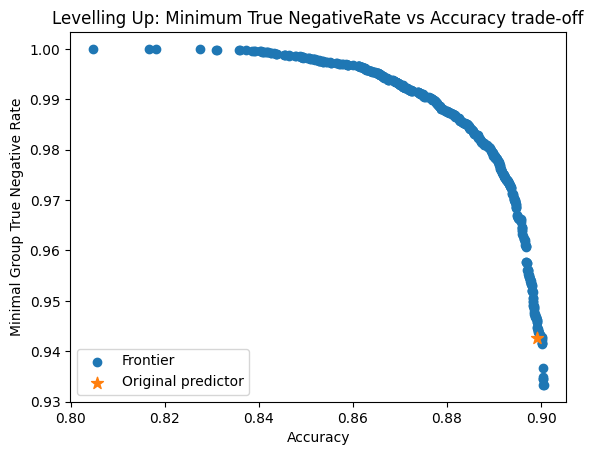

In [ ]:
#plot
fpredictor.plot_frontier(objective1=gm.true_neg_rate.min,objective2=gm.accuracy, show_updated=False)
plt.title('Levelling Up: Minimum True NegativeRate vs Accuracy trade-off')


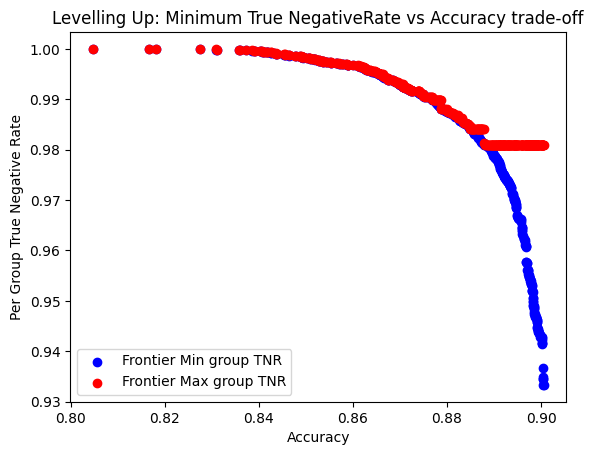

In [ ]:
#Plot per group trade-off
fpredictor.plot_frontier(objective1=gm.true_neg_rate.min,objective2=gm.accuracy, color='blue')
fpredictor.plot_frontier(objective1=gm.true_neg_rate.max,objective2=gm.accuracy,new_plot=False,color='red')
plt.title('Levelling Up: Minimum True NegativeRate vs Accuracy trade-off')
plt.ylabel('Per Group True Negative Rate')
plt.legend(('Frontier Min group TNR','Frontier Max group TNR'))

Text(0.5, 1.0, 'Levelling Up: Minimum True NegativeRate vs Accuracy trade-off')

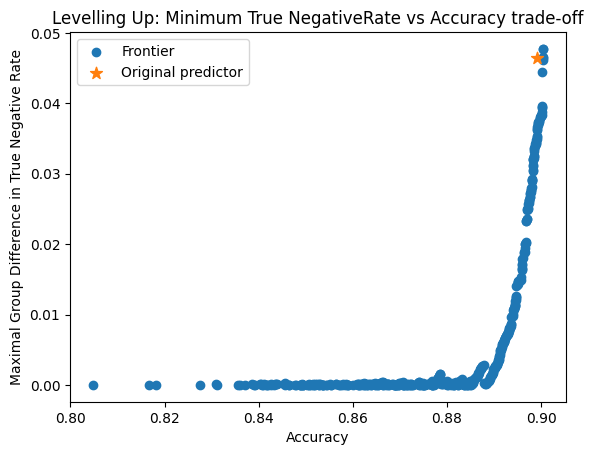

In [ ]:
#Plot difference in true negative rate vs accuracy for the new pareto frontier
fpredictor.plot_frontier(objective1=gm.true_neg_rate.diff,objective2=gm.accuracy, show_updated=False)
plt.title('Levelling Up: Minimum True NegativeRate vs Accuracy trade-off')
